# Extracting text from images and analysing the sentiment

In [ ]:
!pip install easyocr --quiet

     |████████████████████████████████| 2.9 MB 39.3 MB/s 
     |████████████████████████████████| 47.6 MB 2.0 MB/s 
     |████████████████████████████████| 108 kB 71.9 MB/s 
     |████████████████████████████████| 604 kB 65.9 MB/s 


In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Reading images

In [ ]:
path = '/content/img.png'

Optical Character recognition

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(path)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[101, 117], [1069, 117], [1069, 184], [101, 184]],
  'Whoever is happy will make others happy too.',
  0.762828302946354)]

**The result gives where the text is in our image and the text which has been recognized and lastly the confidence.**

### Visualizing where the text is in the image

In [ ]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

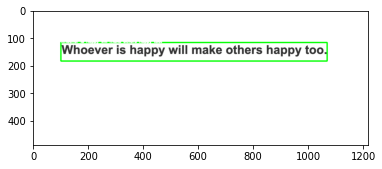

In [ ]:
img = cv2.imread(path)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [ ]:
single_text = result[0][1]
single_text

'Whoever is happy will make others happy too.'

### Image with multiple lines of text 

In [ ]:
path2 = '/content/img.png'
reader = easyocr.Reader(['en'])
result = reader.readtext(path2)
result

[([[101, 117], [1069, 117], [1069, 184], [101, 184]],
  'Whoever is happy will make others happy too.',
  0.762828302946354)]

Getting the text extracted from the image

In [ ]:
result
final_text = result[0][1] 
final_text

'Whoever is happy will make others happy too.'

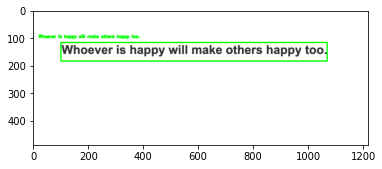

In [ ]:
img = cv2.imread(path2)
spacer = 100
for detection in result: 
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()

## Sentiment Analysis on the extracted text

In [ ]:
!pip install textblob
!python -m textblob.download_corpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob 
import nltk

### Sentiment of the first image with single word

In [ ]:
blob1 = TextBlob(single_text)
blob1.tags

[('Whoever', 'WP'),
 ('is', 'VBZ'),
 ('happy', 'JJ'),
 ('will', 'MD'),
 ('make', 'VB'),
 ('others', 'NNS'),
 ('happy', 'JJ'),
 ('too', 'RB')]

In [ ]:
blob1.noun_phrases

WordList(['whoever'])

In [ ]:
print(blob1.sentiment)

Sentiment(polarity=0.8, subjectivity=1.0)


### Sentiment of the second image with multiple words

In [ ]:
blob = TextBlob(final_text)
blob.tags

[('Whoever', 'WP'),
 ('is', 'VBZ'),
 ('happy', 'JJ'),
 ('will', 'MD'),
 ('make', 'VB'),
 ('others', 'NNS'),
 ('happy', 'JJ'),
 ('too', 'RB')]

In [ ]:
print(blob.sentiment)

Sentiment(polarity=0.8, subjectivity=1.0)
